# Week 2 Seminar.

## Chapter 2. Statistical Learning. ISLP textbook.

### Course: ML with Python, 2023/2024, HSE
### Author: Oleg Melnikov, Teaching Team.

In this exercise we will explore some of the datasets included with the textbook.

The exploration is done in Python. Those new to Python will need to invest more time early on into learning the language. LMS Modules have Python video tutorials (and quizzes) from Corey Schafer to help students ramp up quickly with Python.

In [1]:
# let the statsmodels library to be consistent with latest pandas
!pip -q install --upgrade statsmodels

# allows us to print multiple outputs from a single Colab cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# load important libraries that we might use
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

# Increase viewable area of Pandas tables, numpy arrays, plots
pd.set_option('display.max_rows', 6, 'display.max_columns', 500, 'display.max_colwidth', 1, 'display.precision', 2)
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)
plt.rcParams['figure.figsize'] = [16, 6]

Let's start with some **guidelines** in data science,  machine learning, and this class (also in [Syllabus](https://docs.google.com/document/d/1gCDuI8C0labz81zv2jOhokd-xszIG8xY/edit#heading=h.hj924b9x6vsl)).

* **Rule #0:** If you ever have a question, just ask. Better ask than be sorry. Asking the right question in the right way is a valuable skill one shall build.
* **Rule #1:** Every output (table, numbers, plots, ...) **must have a purpose and an interpretation**.
   * We never produce outputs for the sake of filling the void.
* **Rule #2:** Every output must be **legible, readable, meaningfully organized, neat, clean, compact, precise, and concise.**
   * Avoid generic terms. Instead of *data* specify whether you mean *observations* or *features*. Instead of *model* specify which one you are referencing (linear regression, logistic regression, version 1, 2, 3, etc.)
* **Rule #3:** No overplotting. No redundant plots. No data dumps.
* **Rule #4:** Annotate your programming code! Don't expect people to understand the full context.
* **Rule #5:** Always start your modeling with a simple **baseline** model (version 0), which you can do with minimal data munging. This is your Proof of Concept (PoC) and your benchmark for any future improvement.
* **Rule #6:** Start your work early! Never procrastinate. Assignments are due on Sunday, when the teaching team is busy and may not be accessible to answer last minute questions.




# Advertising Data Set with Pandas DataFrame

See Corey Schafer tutorial [videos](https://www.youtube.com/c/Coreyms?embed=no). These cover various structures and operations in Python, incl. dataframes, matrices, visualization techniques, etc.

We can load dataframe directly from URL (where all textbook data files are stored).

**Why**: We want to evaluate the *Advertising* data matrix in Colab and observe its structure and values.

**Takeaway**:
* From results below we learn that our dataframe `df` has 200 observations and 4 variables, where `sales` is our response variable that we want to predict. Other variables (columns) are features.
* All values appear numeric.
* We do not observe any missing values
* `TV` has appears to have largest range, which is, at least, $283.6-17.2$
* `radio` appears to correlate with `newspaper`. They have a few large values in observations 0,1,2,198 and small values in other viewable observations.
* Notice that we can gain a great deal of insight from just 6 viewable observations.

In [3]:
csv_url = 'https://raw.githubusercontent.com/omelnikov/data/main/advertising/advertising.csv'  # assign file path to a variable
col_names = ['TV', 'radio', 'newspaper', 'sales']
df = pd.read_csv(csv_url)[col_names]  # load dataframe and slice (filter) columns
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
...,...,...,...,...
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
...,...,...,...,...
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [6]:
df.TV

0      230.1
1      44.5 
2      17.2 
       ...  
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [8]:
type(df['TV'])

pandas.core.series.Series

In [9]:
type(df)

pandas.core.frame.DataFrame

## Data Types

We proceed to some exploration of the dataset. `df.info()` is a quick way to investigate any obvious problems.

**Why:** We should always familiarize ourselves with the data structures of our data. Unexpected data types can ruin model performance. For example, numbers loaded as strings will lose their ordering and associated algebraic operations.

**Takeaway:** The results of `df.info()` below indicate
* no missing values => not a problem for numeric computations
* all floating value variables => not a problem for numeric computation
* 6.4KB data in memory => not a problem on RAM resources
* 4 variables and 200 values in every column, as expected

In [11]:
df['TV'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: TV
Non-Null Count  Dtype  
--------------  -----  
200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Scatterplot

We can plot directly from dataframe objects without explicitly calling the `matplotlib` library. Visualizations are effective summarization tools, but they have their limitations, advantages and disadvantages. Mastering these techniques and building intuition takes time and effort.

**Why**: We want to further explore the relationship between `radio` and `newspaper`. We can do so with a scatterplot.

**Takeaway:**
* A strong relationship between two variables would be expressed in some shape. A randomly dispersed points suggest no relationship. A linear relationship would be expressed as a stretched cloud along some non-horizontal line. We do not see it here.
* However, we observe some skew of data points into the right area of the plot.
* In general, the collinearity of these two variables should not be a concern when we predict `sales`, but the extreme 4 observations could be problematic for models using Euclidean-based distance metrics because the coordinate values of these points will dominate the training of the model coefficients.
* Notice that 3 points in the right-upper corner have both extreme coordinates; and one point (in the right lower area) has only one extreme coordinate.

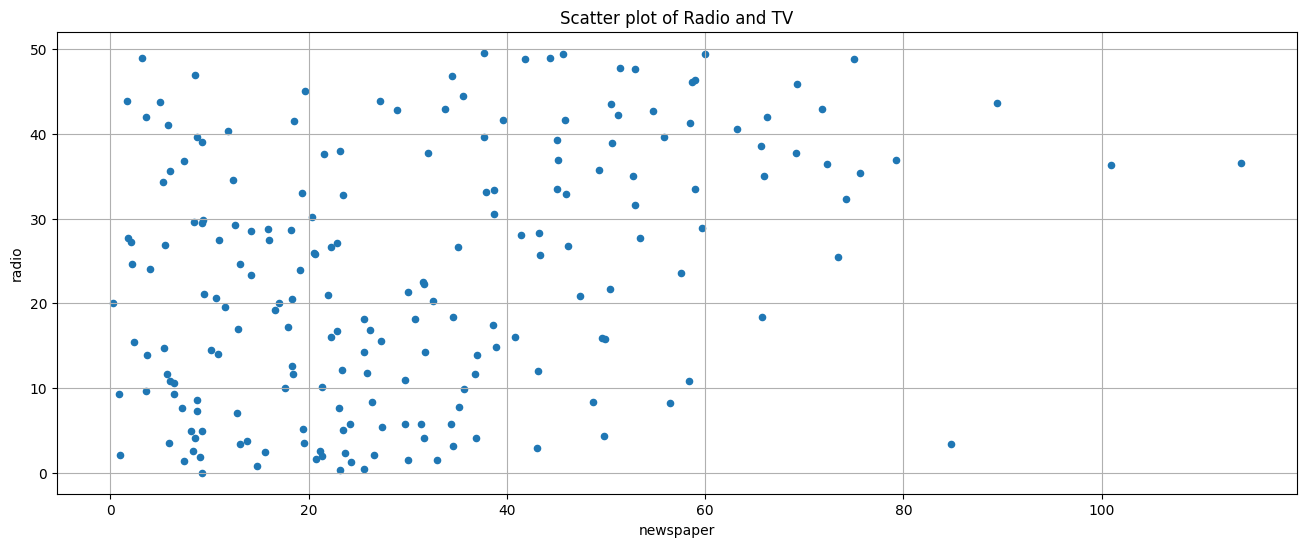

In [14]:
# note the semicolon, which suppresses extraneous output
df.plot.scatter('newspaper', 'radio', grid=True, title='Scatter plot of Radio and TV');

## Correlation

Dataframes can allow us to compute various statistics in a single call of its method.

**Why:** We would like to summarize the relationship even further with a Pearson correlation coefficient. Notably, it only measures a linear relationship among pairs of coordinate values.

**Takeaway:**
* Diagonal elements are correlations of variables with themselves, so these are all ones. The off-diagonal values indicate the sample correlations between each pair of variables. In particular, 0.35 between `newspaper` and `radio`. This is not very high, but is indicative of some linear relationship, which is consistent with our observation of the scatter plot above.
* So, the small collinearity is present, but not a major concern for now.


In [15]:
df.corr()

,TV,radio,newspaper,sales
TV,1.00,0.05,0.06,0.78
radio,0.05,1.00,0.35,0.58
newspaper,0.06,0.35,1.00,0.23
sales,0.78,0.58,0.23,1.00


In [18]:
df[['newspaper', 'radio']].corr()

,newspaper,radio
newspaper,1.00,0.35
radio,0.35,1.00


## Basic stats

Actually, there is an easier way to observe basic statistics for our variables. In doing so, we should always try to assess the 4 moments of each variable:
1. **Centrality** tells us the location of each variable. The typical measures are mean, median, mode, truncated mean, etc. If mean $\approx$ median, then the distribution is symmetric.
2. **Dispersion** tells us the dispersion of the values. The typical measures are variance, standard deviation, range, interquartile range (IQR).
3. **Skewness** tells us whether the distribution of values is left/right skewed or symmetric.
4. **Kurtosis** tells us whether extreme values are present in the data. These can be problematic for many models that use Euclidean metrics to measure importance of similarity among variables. Extreme values can potentially be [**influential**](https://en.wikipedia.org/wiki/Influential_observation) (greatly affecting the slope of the regression models).

**Why:** We want to quickly evaluate any anomalies in distributions of variables.

**Takeaway:** From basic stats below we learn that
* **Centrality**:
  * `TV` mean is and median are similar ($147\approx 150$, given the `std` of 86). Symmetric distribution might be modeled with normal densities (IF needed). So, we make a note of this symmetry. Note that `TV` has ~6x larger budget than `radio` or `newspaper`.
  * `radio` mean and median are also similar, in light of `std` of ~15
  * `newspaper` appears slightly right skew with its mean being larger than median. This suggests right skew or heavy right tail (some extreme positive values). Indeed, we note a max value of 114, which is ~4.5x larger than median, while the min is only 0.3. The extreme values can influence some models, if the corresponding response values are not extreme.
* ... we proceed with observing and evaluating each moment of each variable


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.04,85.85,0.7,74.38,149.75,218.82,296.4
radio,200.0,23.26,14.85,0.0,9.97,22.90,36.52,49.6
newspaper,200.0,30.55,21.78,0.3,12.75,25.75,45.10,114.0
sales,200.0,14.02,5.22,1.6,10.38,12.90,17.40,27.0


## Relationships

**Why:** The stats above value hint on relationships among our variables. We can build a quick visualization to evaluate any potentially strong relationship, which can either help or hurt the model. The relationships with response are beneficial, while the relationships among features are problematic. The latter introduce redundancy into the dataset. This could cause instability and hinder interpretability of trained regression parameters.

**Takeaway:**

Scatterplots
* The relationships among features are not obvious. In particular, `TV` and `radio` appear as pure noise from a uniform distribution in both coordinates.
* A strong relationship is noted between `TV` and `sales` responses.
* `radio` has a weaker explanatory power of `sales`
* `newspaper` appears to have almost no relation to `sales`, but some relations to `radio`
* We should also consider some transformations of features that would strengthen their explanatory power of `sales`, at least, in a linear model.

Histograms
* `TV` and `radio` appear uniformly distributed
* `newspaper` appears to follow some [triangular distribution](https://en.wikipedia.org/wiki/Triangular_distribution). It also reminds us of exponential. To a lesser degree it is similar to [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution). Notice the right tail frequency at around 100 value. We observed it in the basic stats summary too.
* `sales` histogram is also similar to another triangular and, to some degree, Gaussian. However, it is not fully symmetric, as we observe the right skew of the distribution. Also, the Gaussian random variable has [support](https://en.wikipedia.org/wiki/Support_(mathematics)) (where density is non-zero) of $\mathbb{R}$, while `sales` variable cannot be negative. So the support of sales is $\mathbb{R}_{\ge0}$




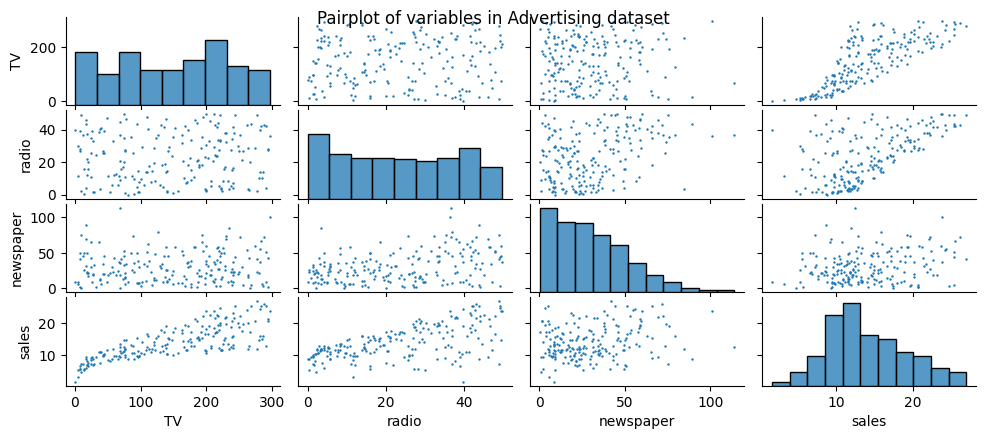

In [21]:
ax = sns.pairplot(df, plot_kws=dict(linewidth=0, s=3));
ax.fig.suptitle("Pairplot of variables in Advertising dataset", y=1);
ax.fig.set_size_inches(10,4);  # control the size of your visualiztaions

## Correlation plot

Typically we avoid redundancy, whenever possible. Here for the sake of demonstrating an alternative method, we use the seaborn library to plot a correlation matrix. Notably, this quantifies the qualitative images we saw above.

**Why:** We want to evaluate the linear relationships among all variables. This suggests the important helpful (correlating with) and problematic features.

**Takeaway:**
* The correlation of 0.78 between `TV` and `sales` should greatly help a linear model.
* `radio` also has a strong correlation with `sales` and uncorrelated with `TV`, hence, `radio` should make an additional contribution to the model's performance.
* `newspaper` has the smallest correlation with `sales`, but is also weakly correlated with other features.
* We do not observe any strong correlations among features.




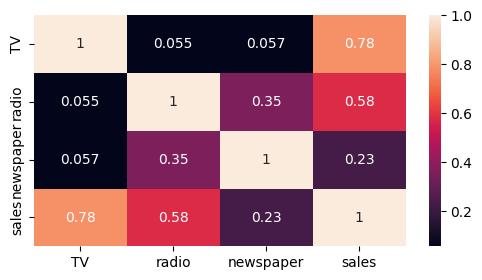

In [24]:
plt.rcParams['figure.figsize'] = [6, 3];  # control the size of your visualiztaions
sns.heatmap(df.corr(), annot = True);     # note the semicolon, which suppresses extraneous output

## Baseline model, v0 (version 0)

Now that some exploratory data analysis (EDA) has been completed, let's drive one model right out the door. No missing values are noted and all variables are numeric. So, we can apply linear regression directly on the given `Advertising` dataset.

### Train and test observations

We first need to (*randomly!*) split the observations into train and test sets. Then train model on train observations and evaluate on the test observations. For reproducibility, we always seed our models with any number (zero is good as any). We hold out 20% of observations for computing **out-of-sample** (testing) performance.

IMPORTART: It is absolutely crucial to assure your response variable is not part of the input. Such **leakage** is a typical mistake. If your model's results are too good to be true, suspect leakage.

We have
* `tX` are training features
* `tY` are the corresponding training responses
* `vX` are validation (testing) features
* `vY` are the corresponding validation (testing) responses.

**Takeaway:** Finally, we do a sanity check and confirm that
* we have 160 train responses and 160 train observations
* 40 test responses and 40 test observations.
* 3 features go into the model during training
* 3 features go into the model during testing.




In [25]:
df.drop('sales', axis=1)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
...,...,...,...
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [26]:
tX, vX, tY, vY = tts(df.drop('sales', axis=1), df['sales'], test_size = 0.2, random_state=0)
print(f'Sanity check for dimensions of variables: {tX.shape, vX.shape, tY.shape, vY.shape}')

Sanity check for dimensions of variables: ((160, 3), (40, 3), (160,), (40,))


**Why:** A rapid prototyping will produce an immediate feedback on our minimal efforts. We will use the results of the model v0 as a benchmark in the next iteration. If v1 model outperforms v0, we'll keep v1. Otherwise, we'll try different alterations.

**Takeaway:**
* The $R^2_{\text{OOS}}=0.82$ is high, but we did observe strong correlations between inputs and response and low correlations among inputs. So, this result is not unusual and leakage is not a concern.
* This baseline model has no bias (intercept) term in the table of coefficients. Perhaps adding it in v1 model would improve the $R^2_{\text{OOS}}$.
* `TV` and `radio` have p-values lower than our specified significance level, $\alpha=0.01$. We consider them significant for this model. Statistically speaking, in each case, we reject the null hypotheses of their coefficients being equal to zero. That is $H_0:\beta_{\text{TV}}=0$, $H_0:\beta_{\text{radio}}=0$ are rejected in favor of their corresponding alternative hypotheses.
* However, we cannot reject $H_0:\beta_{\text{newsp
aper}}=0$ at $\alpha=0.01$ because p-value of 0.064 exceeds the specified $\alpha$.
  * Before we discard `newspaper` variable as insignificant, let's add a bias term and re-assess the performance and variable importance.
* The coefficients are telling us that holding all else equal, spending \$1 on `TV` ads should increase `sales` by 5 cents, while spending \$1 on `radio` ads should increase `sales` by 23 cents.




In [27]:
mdl = sm.OLS(tY, tX)

In [28]:
mdl

In [29]:
fmdl = mdl.fit()

In [33]:
fmdl.summary(title='Baseline model for Advertising dataset', alpha=.01)

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Baseline model for Advertising dataset                        
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              3191.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):                   2.03e-140
Time:                        07:29:11   Log-Likelihood:                         -331.22
No. Observations:                 160   AIC:                                      668.4
Df Residuals:                     157   BIC:                                      677.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
TV             0.0528      0.001     36.622      0.000       0.049       0.057
radio          0.2327      0.010     23.630      0.000       0.207       0.258
newspaper      0.0136      0.007      1.868      0.064      -0.005       0.033
==============================================================================
Omnibus:                        2.123   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                2.140
Skew:                           0.273   Prob(JB):                        0.343
Kurtosis:                       2.847   Cond. No.                         12.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fmdl

In [ ]:
mdl = sm.OLS(tY, tX)     # training on train observations
fmdl = mdl.fit()
print(fmdl.summary(title='Baseline model for Advertising dataset', alpha=.01))
pY = fmdl.predict(vX)   # predicted values on the testing set
print(f'Out of sample R^2 is {r2_score(vY,pY):.2f}')

In [34]:
from sklearn.metrics import mean_squared_error

In [38]:
vX.shape

(40, 3)

In [37]:
fmdl.predict(vX)

18     8.67 
170    5.59 
107    5.15 
       ...  
4      12.85
83     14.45
106    4.28 
Length: 40, dtype: float64

In [41]:
np.sqrt(mean_squared_error(vY, fmdl.predict(vX)))

2.378507420225157

In [43]:
list(zip(vY, fmdl.predict(vX)))t

[(11.3, 8.670252973056922),
 (8.4, 5.587404313363748),
 (8.7, 5.154165288775357),
 (25.4, 25.82349020165025),
 (11.7, 11.272618420948044),
 (8.7, 4.694889341387616),
 (7.2, 12.858036716942834),
 (13.2, 14.484032553473526),
 (9.2, 10.319430545857013),
 (16.6, 16.040199815413864),
 (24.2, 24.465821082220515),
 (10.6, 7.698379017571947),
 (10.5, 8.979571953313545),
 (15.6, 14.947343460206438),
 (11.8, 10.547342359220155),
 (13.2, 11.060402638584902),
 (17.4, 18.670879006158934),
 (1.6, 9.371096760293248),
 (14.7, 16.0583947617651),
 (17.0, 17.161365079985632),
 (26.2, 26.15540932303656),
 (10.3, 7.966231532279705),
 (14.9, 14.901962967812112),
 (12.9, 11.700233223675175),
 (8.1, 3.578619773978973),
 (15.2, 14.715172663334593),
 (12.6, 11.302883951304795),
 (22.6, 21.57740118111251),
 (11.6, 12.588000667499164),
 (8.5, 7.89341374589388),
 (12.5, 13.64314826499392),
 (23.7, 22.80504413153881),
 (16.1, 18.546351694881533),
 (21.8, 21.91011668054298),
 (5.6, 5.070448241025321),
 (6.7, 4.12038